# Let's explore how EI looks in very simple networks

In [1]:
import os
from pathlib import Path
from itertools import islice
import gzip
import pickle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms

from ei import topology_of, EI_of_layer

In [2]:
# Pretty colormaps
def greyscaleMap(collection, item):
    size = len(collection)
    pos = collection.index(item)
    colormap = matplotlib.cm.get_cmap("binary")
    return colormap((((0.6 / size * pos) + 0.1)))
                    
def rainbowMap(collection, item):
    size = len(collection)
    pos = collection.index(item)
    colormap = matplotlib.cm.get_cmap("rainbow")
    return colormap(1.0 * pos / size)

def magmaMap(collection, item):
    size = len(collection)
    pos = collection.index(item)
    colormap = matplotlib.cm.get_cmap("magma")
    return colormap(1.0 * pos / size)

def makeColor(collection, item, cmap = "rainbow"):
    size = len(collection)
    pos = collection.index(item)
    colormap = matplotlib.cm.get_cmap(cmap)
    return colormap((((0.6 / size * pos) + 0.3)))

def blueMap(collection, item):
    size = len(collection)
    pos = collection.index(item)
    colormap = matplotlib.cm.get_cmap("Blues")
    return colormap(0.85 * pos / size + 0.15) # avoid using the lightest blue color -- it's not visible

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# dtype = torch.cuda.float if torch.cuda.is_available() else torch.float
dtype = torch.float32
torch.set_default_dtype(dtype)
print(f"Using device: {device}")

Using device: cuda


## A -> B sigmoid, gray

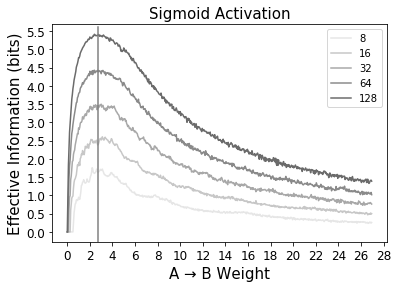

In [104]:
singleton = nn.Linear(1, 1, bias=False).to(device)
top = topology_of(singleton, torch.zeros((1, 1)).to(device))

fig, ax = plt.subplots(1,1)

ws = np.arange(0, 27, 0.05)
binSizes = [8, 16, 32, 64, 128]
for binSize in binSizes:
    color = greyscaleMap(binSizes, binSize)
    eis = []
    for w in ws:
        singleton.weight.data[0][0] = w
        eis.append(EI_of_layer(singleton, top, samples=5000, batch_size=1000, bins=binSize, 
                               in_range=(0, 1), out_range=(0, 1), activation=nn.Sigmoid(), device=device))
#     if binSize == 64: color = 'black'   
    ax.plot(ws, eis, color=color, label=str(binSize))
    
# TODO: add a legend with the greyscale values
    
# Perhaps use tickmarks of e size?
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2.0))
ax.tick_params(axis='both',which='major',labelsize=12)
#ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(numpy.e))
#ax.xaxis.set_ticklabels(['','0','e','2e','3e','4e','5e','6e','7e','8e','9e','10e'])

plt.draw()
limit = ax.get_ylim()
plt.autoscale(False)
# Plot the vertical line indicating e
plt.plot((np.e, np.e), (limit[0], 5.6), 'gray')

# fitY = EIfit(plotValues)
# plt.plot(plotValues, fitY)

# The labels

ax.set_title("Sigmoid Activation", fontsize=15)
ax.set_xlabel('A → B Weight', fontsize=15)
ax.set_ylabel('Effective Information (bits)',fontsize=15)
plt.legend()

plt.savefig("figures/sigmoid-1d-gray", dpi=300)

## A -> B Sigmoid (blue)

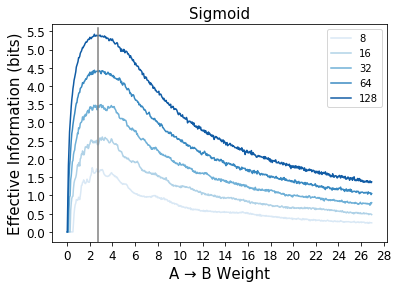

In [5]:
singleton = nn.Linear(1, 1, bias=False).to(device)
top = topology_of(singleton, torch.zeros((1, 1)).to(device))

fig, ax = plt.subplots(1,1)

ws = np.arange(0, 27, 0.05)
binSizes = [8, 16, 32, 64, 128]
for binSize in binSizes:
    color = blueMap(binSizes, binSize)
    eis = []
    for w in ws:
        singleton.weight.data[0][0] = w
        eis.append(EI_of_layer(singleton, top, samples=10000, batch_size=1000, bins=binSize, 
                               in_range=(0, 1), out_range=(0, 1), activation=nn.Sigmoid(), device=device))
#     if binSize == 64: color = 'black'   
    ax.plot(ws, eis, color=color, label=str(binSize))
    
# TODO: add a legend with the greyscale values
    
# Perhaps use tickmarks of e size?
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2.0))
ax.tick_params(axis='both',which='major',labelsize=12)
#ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(numpy.e))
#ax.xaxis.set_ticklabels(['','0','e','2e','3e','4e','5e','6e','7e','8e','9e','10e'])

plt.draw()
limit = ax.get_ylim()
plt.autoscale(False)
# Plot the vertical line indicating e
plt.plot((np.e, np.e), (limit[0], 5.6), 'gray')

# fitY = EIfit(plotValues)
# plt.plot(plotValues, fitY)

# The labels

ax.set_title("Sigmoid", fontsize=15)
ax.set_xlabel('A → B Weight', fontsize=15)
ax.set_ylabel('Effective Information (bits)',fontsize=15)
plt.legend()

plt.savefig("figures/sigmoid-1d-blue", dpi=300, bbox_inches='tight')

# A -> B Tanh, Gray

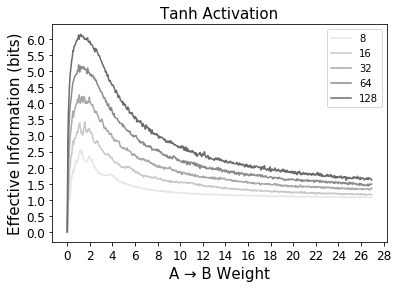

In [107]:
singleton = nn.Linear(1, 1, bias=False).to(device)
top = topology_of(singleton, torch.zeros((1, 1)).to(device))

fig, ax = plt.subplots(1,1)

ws = np.arange(0, 27, 0.05)
binSizes = [8, 16, 32, 64, 128]
for binSize in binSizes:
    color = greyscaleMap(binSizes, binSize)
    eis = []
    for w in ws:
        singleton.weight.data[0][0] = w
        eis.append(EI_of_layer(singleton, top, samples=5000, batch_size=1000, bins=binSize, 
                               in_range=(-1, 1), out_range=(-1, 1), activation=nn.Tanh(), device=device))
#     if binSize == 64: color = 'black'   
    ax.plot(ws, eis, color=color, label=str(binSize))
    
# TODO: add a legend with the greyscale values
    
# Perhaps use tickmarks of e size?
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2.0))
ax.tick_params(axis='both',which='major',labelsize=12)
#ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(numpy.e))
#ax.xaxis.set_ticklabels(['','0','e','2e','3e','4e','5e','6e','7e','8e','9e','10e'])

plt.draw()
limit = ax.get_ylim()
plt.autoscale(False)
# Plot the vertical line indicating e
# plt.plot((np.e, np.e), (limit[0], 5.6), 'gray')

# fitY = EIfit(plotValues)
# plt.plot(plotValues, fitY)

# The labels

ax.set_title("Tanh Activation", fontsize=15)
ax.set_xlabel('A → B Weight', fontsize=15)
ax.set_ylabel('Effective Information (bits)',fontsize=15)
plt.legend()

plt.savefig("figures/tanh-1d-gray", dpi=300)

## A -> B Tanh, Blue

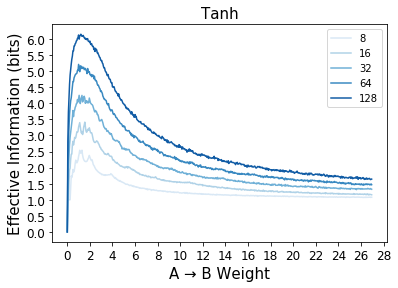

In [6]:
singleton = nn.Linear(1, 1, bias=False).to(device)
top = topology_of(singleton, torch.zeros((1, 1)).to(device))

fig, ax = plt.subplots(1,1)

ws = np.arange(0, 27, 0.05)
binSizes = [8, 16, 32, 64, 128]
for binSize in binSizes:
    color = blueMap(binSizes, binSize)
    eis = []
    for w in ws:
        singleton.weight.data[0][0] = w
        eis.append(EI_of_layer(singleton, top, samples=10000, batch_size=1000, bins=binSize, 
                               in_range=(-1, 1), out_range=(-1, 1), activation=nn.Tanh(), device=device))
#     if binSize == 64: color = 'black'   
    ax.plot(ws, eis, color=color, label=str(binSize))
    
# TODO: add a legend with the greyscale values
    
# Perhaps use tickmarks of e size?
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2.0))
ax.tick_params(axis='both',which='major',labelsize=12)
#ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(numpy.e))
#ax.xaxis.set_ticklabels(['','0','e','2e','3e','4e','5e','6e','7e','8e','9e','10e'])

plt.draw()
limit = ax.get_ylim()
plt.autoscale(False)
# Plot the vertical line indicating e
# plt.plot((np.e, np.e), (limit[0], 5.6), 'gray')

# fitY = EIfit(plotValues)
# plt.plot(plotValues, fitY)

# The labels

ax.set_title("Tanh", fontsize=15)
ax.set_xlabel('A → B Weight', fontsize=15)
ax.set_ylabel('Effective Information (bits)',fontsize=15)
plt.legend()

plt.savefig("figures/tanh-1d-blue", dpi=300, bbox_inches='tight')

## A, B -> C Sigmoid, Gray

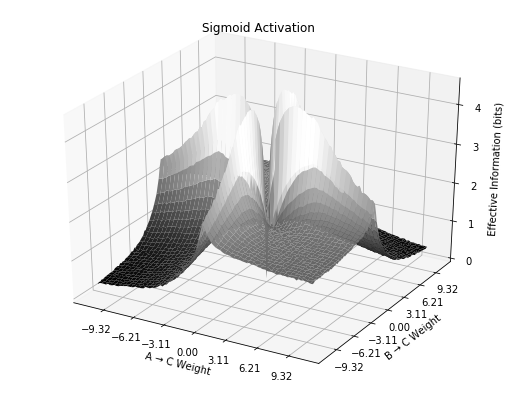

In [110]:
tiny_network = nn.Linear(2, 1, bias=False).to(device)
top = topology_of(tiny_network, input=torch.zeros(1, 2).to(device))

bins = 64
evalPoints = 100 # originally 50... total = evalPoints * evalPoints
lbound, ubound = -np.e * 4.0, np.e * 4.0
stepSize = (ubound - lbound) / evalPoints

fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
x = y = np.arange(lbound, ubound, stepSize)
X, Y = np.meshgrid(x, y)
rX,rY = np.ravel(X), np.ravel(Y)

eis = []
for i in range(evalPoints * evalPoints):
    wA, wB = rX[i], rY[i]
    weights = torch.tensor([[wA, wB]]).to(device)
    tiny_network.weight.data = weights
    EI = EI_of_layer(tiny_network, top, samples=10000, batch_size=1000, bins=bins, 
                     in_range=(0, 1), out_range=(0, 1), activation=nn.Sigmoid(), device=device)
    eis.append(EI)
    
zs = np.array(eis)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=plt.cm.gray)

size = ubound - lbound
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(size / 7))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(size / 7))

ax.set_title("Sigmoid Activation")
ax.set_xlabel('A → C Weight')
ax.set_ylabel('B → C Weight')
ax.set_zlabel('Effective Information (bits)')

plt.savefig("figures/sigmoid-2d-gray", dpi=300)

## A, B -> C Sigmoid, Blues, with Title

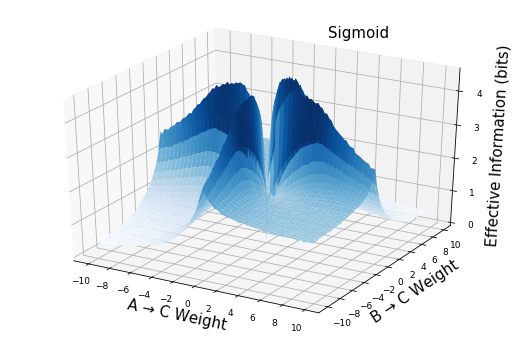

In [28]:
tiny_network = nn.Linear(2, 1, bias=False).to(device)
top = topology_of(tiny_network, input=torch.zeros(1, 2).to(device))

bins = 64
evalPoints = 100 # originally 50... total = evalPoints * evalPoints
lbound, ubound = -10.0, 10.0
stepSize = (ubound - lbound) / evalPoints

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
x = y = np.arange(lbound, ubound, stepSize)
X, Y = np.meshgrid(x, y)
rX,rY = np.ravel(X), np.ravel(Y)

eis = []
for i in range(evalPoints * evalPoints):
    wA, wB = rX[i], rY[i]
    weights = torch.tensor([[wA, wB]]).to(device)
    tiny_network.weight.data = weights
    EI = EI_of_layer(tiny_network, top, samples=10000, batch_size=1000, bins=bins, 
                     in_range=(0, 1), out_range=(0, 1), activation=nn.Sigmoid(), device=device)
    eis.append(EI)
    
zs = np.array(eis)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=plt.cm.Blues)

size = ubound - lbound
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2.0))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2.0))
ax.tick_params(axis='both',which='major',labelsize=9)

ax.set_title("Sigmoid", fontsize=15, x=0.7, y=0.965)
ax.set_xlabel('A → C Weight', fontsize=15)
ax.set_ylabel('B → C Weight', fontsize=15)
ax.set_zlabel('Effective Information (bits)', fontsize=15)

plt.savefig("figures/sigmoid-2d-blue", dpi=300, bbox_inches='tight')

## A, B -> C Tanh, Grey

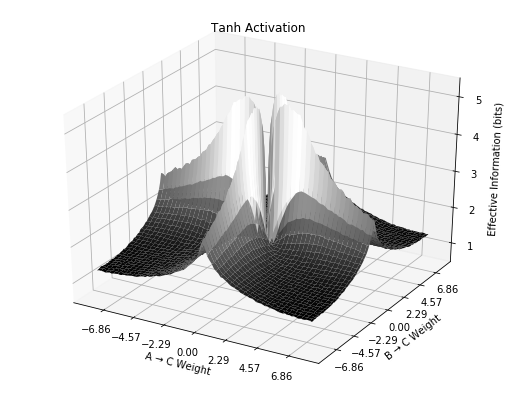

In [114]:
tiny_network = nn.Linear(2, 1, bias=False).to(device)
top = topology_of(tiny_network, input=torch.zeros(1, 2).to(device))

bins = 64
evalPoints = 100 # originally 50... total = evalPoints * evalPoints
lbound, ubound = -8.0, 8.0
stepSize = (ubound - lbound) / evalPoints

fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')
x = y = np.arange(lbound, ubound, stepSize)
X, Y = np.meshgrid(x, y)
rX,rY = np.ravel(X), np.ravel(Y)

eis = []
for i in range(evalPoints * evalPoints):
    wA, wB = rX[i], rY[i]
    weights = torch.tensor([[wA, wB]]).to(device)
    tiny_network.weight.data = weights
    EI = EI_of_layer(tiny_network, top, samples=10000, batch_size=1000, bins=bins, 
                     in_range=(-1, 1), out_range=(-1, 1), activation=nn.Tanh(), device=device)
    eis.append(EI)
    
zs = np.array(eis)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=plt.cm.gray)

size = ubound - lbound
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(size / 7))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(size / 7))

ax.set_title("Tanh Activation")
ax.set_xlabel('A → C Weight')
ax.set_ylabel('B → C Weight')
ax.set_zlabel('Effective Information (bits)')

plt.savefig("figures/tanh-2d-gray", dpi=300)

## A, B -> C Tanh, Blues, Title

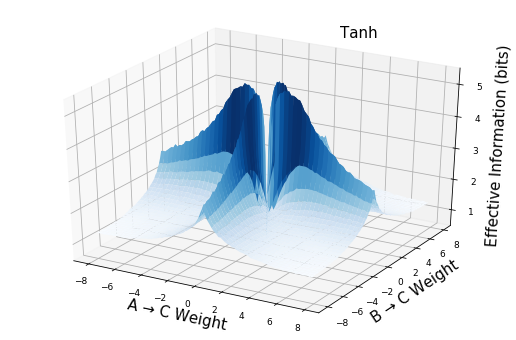

In [30]:
tiny_network = nn.Linear(2, 1, bias=False).to(device)
top = topology_of(tiny_network, input=torch.zeros(1, 2).to(device))

bins = 64
evalPoints = 100 # originally 50... total = evalPoints * evalPoints
lbound, ubound = -8.0, 8.0
stepSize = (ubound - lbound) / evalPoints

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
x = y = np.arange(lbound, ubound, stepSize)
X, Y = np.meshgrid(x, y)
rX,rY = np.ravel(X), np.ravel(Y)

eis = []
for i in range(evalPoints * evalPoints):
    wA, wB = rX[i], rY[i]
    weights = torch.tensor([[wA, wB]]).to(device)
    tiny_network.weight.data = weights
    EI = EI_of_layer(tiny_network, top, samples=10000, batch_size=1000, bins=bins, 
                     in_range=(-1, 1), out_range=(-1, 1), activation=nn.Tanh(), device=device)
    eis.append(EI)
    
zs = np.array(eis)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=plt.cm.Blues)

size = ubound - lbound
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
ax.tick_params(axis='both',which='major',labelsize=9)

ax.set_title("Tanh", fontsize=15, x=0.7, y=0.965)
ax.set_xlabel('A → C Weight', fontsize=15)
ax.set_ylabel('B → C Weight', fontsize=15)
ax.set_zlabel('Effective Information (bits)', fontsize=15)

plt.savefig("figures/tanh-2d-blue", dpi=300, bbox_inches='tight')